# Imports

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.optimize import linear_sum_assignment
from filterpy.kalman import KalmanFilter

### video capture and saving

# Experiment - 1 Moving camera with static object

In [3]:
exp1 = "/Users/batisnim/Downloads/IMG_6332.MOV"

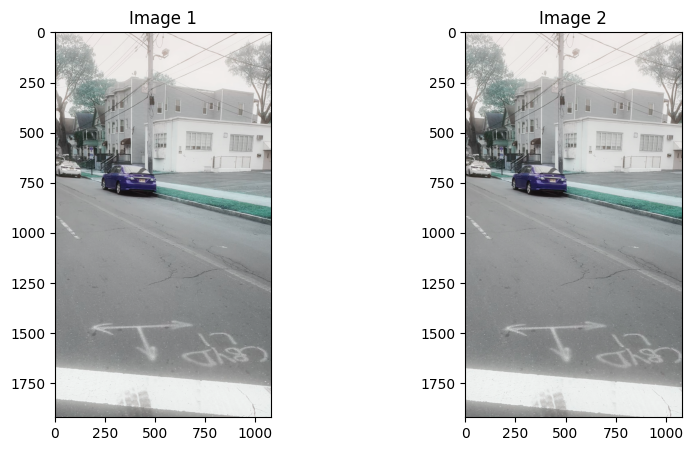

In [4]:
cap = cv.VideoCapture(exp1)
ret, sample1_1 = cap.read()
ret, sample1_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample1_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample1_2)
plt.title('Image 2')

plt.show()

In [5]:
cap = cv.VideoCapture(exp1)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 239, 659, 269, 148
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp1_Videotracked_video.mp4"



# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out= cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))




term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[1.4876253e+02],
       [6.7168533e+01],
       [4.1773716e+01],
       [1.7881556e+01],
       [1.2171479e+01],
       [1.1345020e+01],
       [6.8370652e+00],
       [4.7333531e+00],
       [4.8836179e+00],
       [3.2307012e+00],
       [2.6296406e+00],
       [1.8031821e+00],
       [3.1555686e+00],
       [1.7280495e+00],
       [5.2592812e+00],
       [5.3344135e+00],
       [1.6529169e+00],
       [1.0518562e+00],
       [3.6063643e+00],
       [1.7280495e+00],
       [1.7280495e+00],
       [2.1037123e+00],
       [7.5132585e-01],
       [2.1037123e+00],
       [9.0159106e-01],
       [1.8031821e+00],
       [9.7672361e-01],
       [9.7672361e-01],
       [6.0106069e-01],
       [1.5777843e+00],
       [1.2021214e+00],
       [2.2539775e+00],
       [2.5545080e+00],
       [2.7047732e+00],
       [4.5079551e+00],
       [1.5026517e-01],
       [1.5026517e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

## meanshift

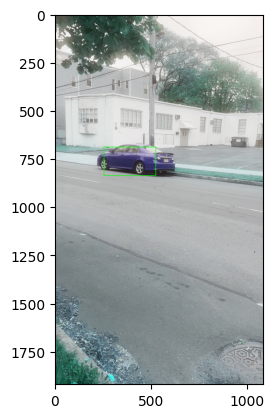

In [13]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out.write(img_with_rect)
        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out.release()
cv.destroyAllWindows()

## camShift


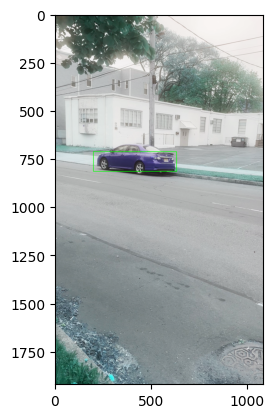

In [7]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out.write(img_with_rect)
        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out.release()
cv.destroyAllWindows()

## CSRT

In [19]:
tracker_CSRT = cv.TrackerCSRT_create()

ok = tracker_CSRT.init(sample1_1, track_window)
# Initialize tracker with the first frame and bounding box

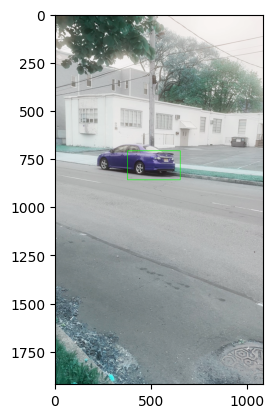

In [22]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out.release()
cv.destroyAllWindows()

## KCF

In [5]:
tracker_KCF = cv.TrackerCSRT_create()

ok = tracker_KCF.init(sample1_1, track_window)
# Initialize tracker with the first frame and bounding box

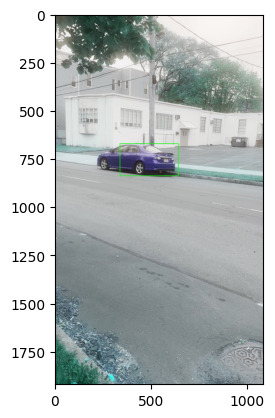

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out.release()
cv.destroyAllWindows()

# Experiment - 2 Moving camera with moving object

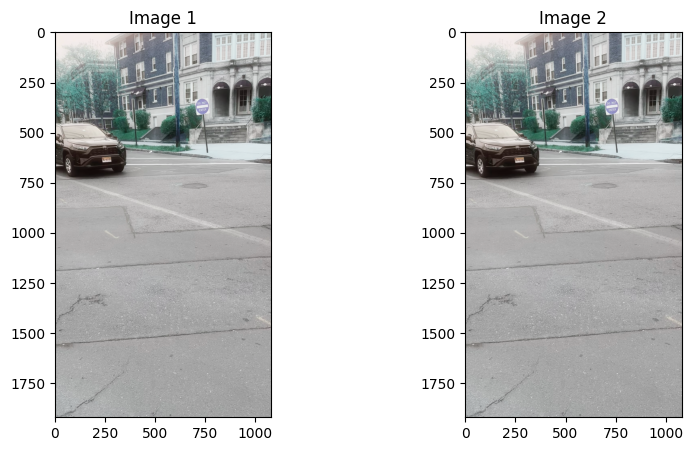

In [2]:


exp2 = "/Users/batisnim/Downloads/Exp2_2.MOV"
cap = cv.VideoCapture(exp2)
ret, sample2_1 = cap.read()
ret, sample2_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample2_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample2_2)
plt.title('Image 2')

plt.show()


In [3]:
cap = cv.VideoCapture(exp2)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 24, 429, 344, 298
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp2.mp4"



# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out2 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.37057984e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.08203673e+00],
       [6.49222076e-01],
       [3.60678911e-01],
       [1.00990093e+00],
       [1.44271564e+00],
       [5.04950464e-01],
       [1.44271567e-01],
       [2.88543135e-01],
       [2.01980186e+00],
       [1.08203673e+00],
       [0.00000000e+00],
       [5.55445528e+00],
       [2.95756721e+00],
       [5.26591206e+00],
       [2.23620930e+01],
       [3.40480881e+01],
       [4.29207916e+01],
       [9.47864227e+01],
       [1.16210747e+02],


## Mean-Shift

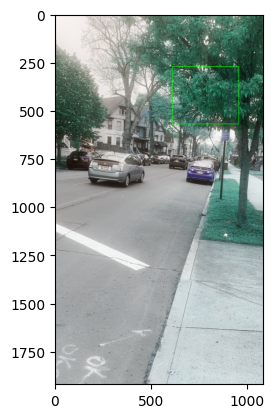

In [4]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2.release()
cv.destroyAllWindows()

## Cam_Shift

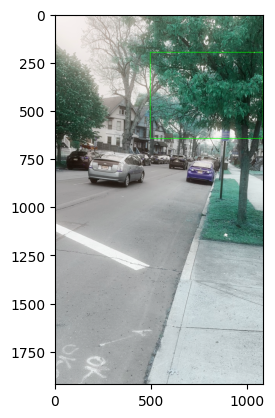

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        #CamShift
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2.release()
cv.destroyAllWindows()

## CSRT

In [7]:
tracker_CSRT = cv.TrackerCSRT_create()

ok = tracker_CSRT.init(sample2_1, track_window)
# Initialize tracker with the first frame and bounding box

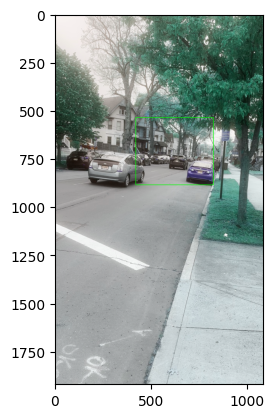

In [8]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2.release()
cv.destroyAllWindows()

## KCF

In [4]:
tracker_KCF = cv.TrackerCSRT_create()

ok = tracker_KCF.init(sample2_1, track_window)
# Initialize tracker with the first frame and bounding box

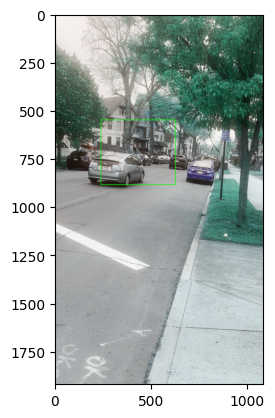

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2.release()
cv.destroyAllWindows()

# Experiment-3

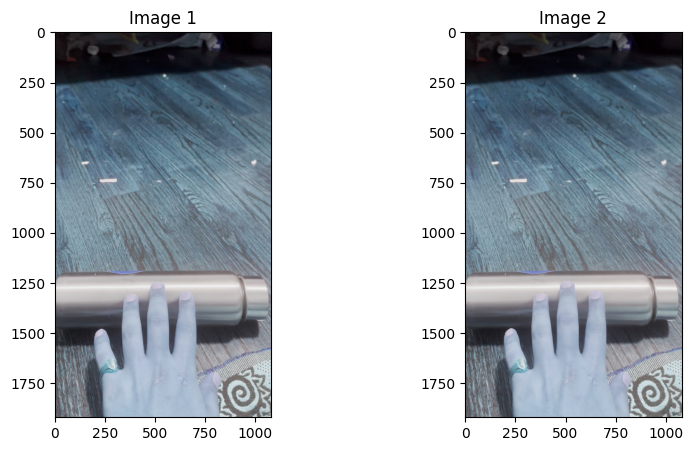

In [3]:
# Exp iii. Static camera with moving object
#exp2 = "/Users/batisnim/Downloads/Exp2.mp4"

exp3 = "/Users/batisnim/Downloads/IMG_6337.MOV"
cap = cv.VideoCapture(exp3)
ret, sample3_1 = cap.read()
ret, sample3_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample3_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample3_2)
plt.title('Image 2')

plt.show()

In [4]:
cap = cv.VideoCapture(exp3)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
#x, y, w, h = 429, 519, 92, 146
#x, y, w, h  = 14, 1116, 1035, 341
x, y, w, h  =  0,1168, 1071, 316
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp3.mp4"



# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out3 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[  9.610553 ],
       [ 23.70603  ],
       [ 28.190954 ],
       [137.75125  ],
       [208.22864  ],
       [147.3618   ],
       [188.36682  ],
       [103.15327  ],
       [ 90.9799   ],
       [ 85.85427  ],
       [ 85.85427  ],
       [ 58.94472  ],
       [103.79397  ],
       [105.71608  ],
       [149.28392  ],
       [ 93.54271  ],
       [ 46.130653 ],
       [126.21859  ],
       [101.231155 ],
       [255.       ],
       [ 62.788944 ],
       [ 33.31658  ],
       [ 10.891959 ],
       [  6.407035 ],
       [  2.562814 ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  

## Mean Shift


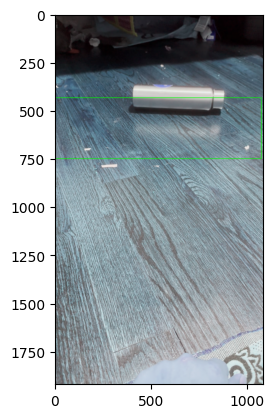

In [13]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
    

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3_1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3_1.release()
cv.destroyAllWindows()

## cam shift

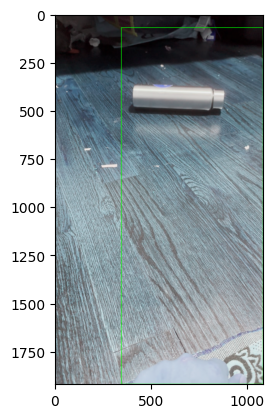

In [5]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        #CamShift
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3.release()
cv.destroyAllWindows()

## CSRT

In [5]:
tracker_CSRT = cv.TrackerCSRT_create()

ok = tracker_CSRT.init(sample3_1, track_window)
# Initialize tracker with the first frame and bounding box

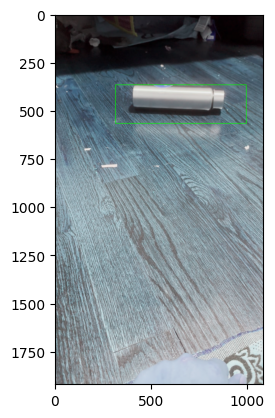

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3.release()
cv.destroyAllWindows()

## KCF

In [5]:
tracker_KCF = cv.TrackerCSRT_create()

ok = tracker_KCF.init(sample3_1, track_window)
# Initialize tracker with the first frame and bounding box

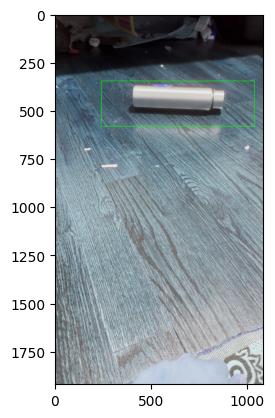

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3.release()
cv.destroyAllWindows()

# Experiment 4 varying object velocity

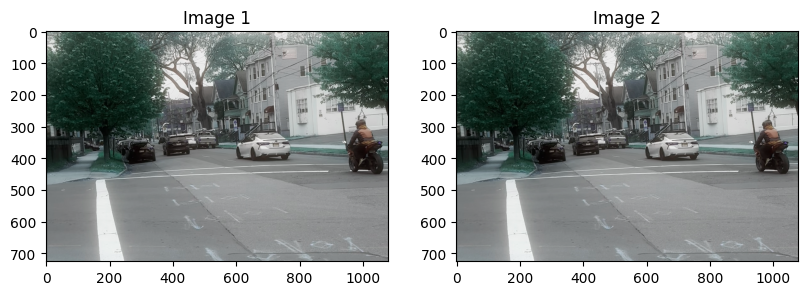

In [3]:

exp4 = "/Users/batisnim/Downloads/IMG_6327 3.mov"
cap = cv.VideoCapture(exp4)
ret, sample4_1 = cap.read()
ret, sample4_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample4_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample4_2)
plt.title('Image 2')

plt.show()

In [4]:
cap = cv.VideoCapture(exp4)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 955, 287, 113, 156
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp4.mp4"


# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out4 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))


term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[  1.4655173 ],
       [  0.        ],
       [  1.4655173 ],
       [  0.9770115 ],
       [  0.        ],
       [  0.        ],
       [  0.9770115 ],
       [  0.        ],
       [  1.954023  ],
       [  0.48850575],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.48850575],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.48850575],
       [  0.        ],
       [  0.        ],
       [  0.48850575],
       [  2.4425287 ],
       [  0.48850575],
       [  4.8850574 ],
       [  2.9310346 ],
       [  0.        ],
       [ 12.212644  ],
       [  2.4425287 ],
       [ 14.655172  ],
       [ 17.586206  ],
       [ 24.425287  ],
       [  5.3735633 ],
       [ 20.028736  ],
       [ 10.747127  ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0

## cam shift

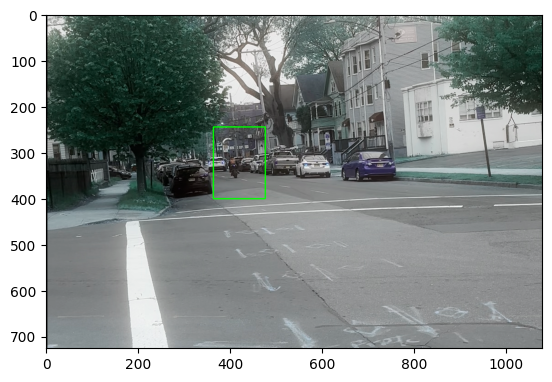

In [19]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
    

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4.release()
cv.destroyAllWindows()

## Mean Shift


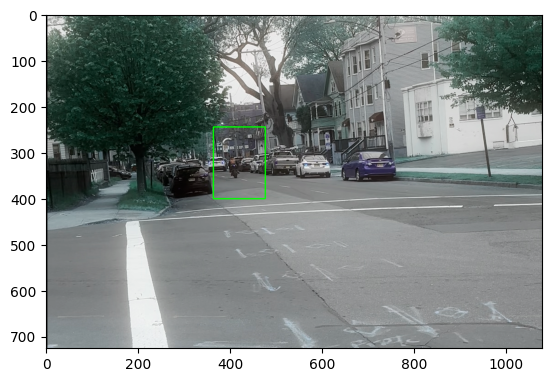

In [4]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
      
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4.release()
cv.destroyAllWindows()

## CSRT

In [15]:
tracker_CSRT = cv.TrackerCSRT_create()

ok = tracker_CSRT.init(sample4_1, track_window)
# Initialize tracker with the first frame and bounding box

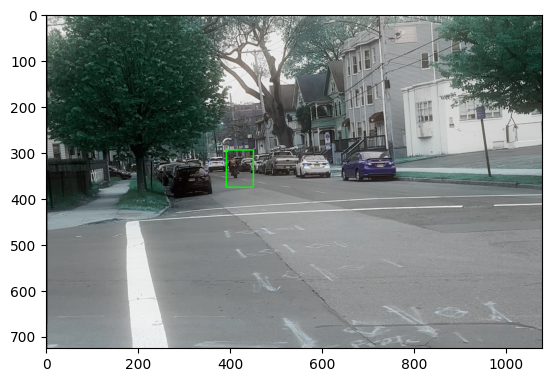

In [16]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4.release()
cv.destroyAllWindows()

## KCF

In [5]:
tracker_KCF = cv.TrackerCSRT_create()

ok = tracker_KCF.init(sample4_1, track_window)
# Initialize tracker with the first frame and bounding box

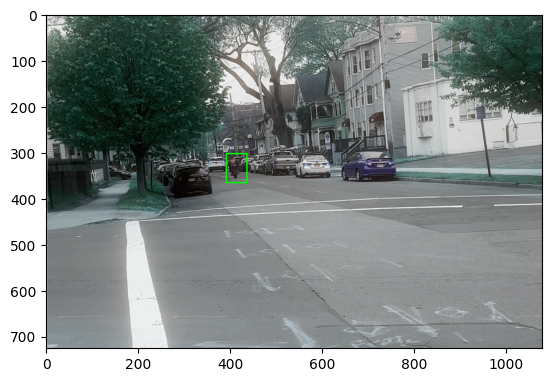

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4.release()
cv.destroyAllWindows()